In [58]:
import pandas as pd
import pingouin as pg
import scipy.stats
import statsmodels.stats.multicomp
import seaborn as sns

In [3]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ro-a/Statistika/lesson5/5_task_1.csv')

In [33]:
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [34]:
pg.anova(data=df, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [16]:
pg.homoscedasticity(df, dv='events', group='group', method='levene')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [39]:
scipy.stats.f_oneway(groupa,groupb,groupc)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [53]:
statsmodels.stats.multicomp.pairwise_tukeyhsd(df.events, df.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [17]:
pg.ttest(df)

TypeError: ttest() missing 1 required positional argument: 'y'

In [18]:
groupa = df.query('group == "A"').events

In [19]:
groupb = df.query('group == "B"').events

In [20]:
groupc = df.query('group == "C"').events

In [21]:
pg.normality(groupa, method='normaltest')

,W,pval,normal
events,2.10346,0.349333,True


In [22]:
pg.normality(groupb, method='normaltest')

,W,pval,normal
events,0.841072,0.656695,True


In [23]:
pg.normality(groupc, method='normaltest')

,W,pval,normal
events,3.243726,0.19753,True


In [25]:
pg.ttest(groupa,groupb)

/opt/tljh/user/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-57.011134,19998,two-sided,0.0,"[-8.31, -7.76]",0.806259,inf,1.0


In [54]:
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ro-a/Statistika/lesson5/5_task_2.csv')

In [56]:
test = df2.query('group == "test"').events

In [57]:
control = df2.query('group == "control"').events

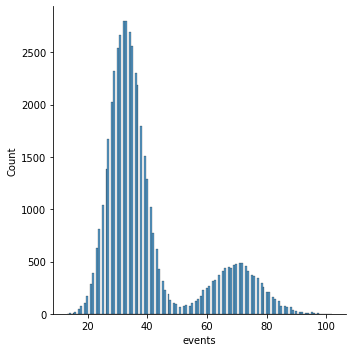

In [59]:
sns.displot(test)

In [63]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [97]:
testhigh = df2.query('group == "test"')
testhigh = testhigh.query('segment == "high"')
testhigh

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
9995,25052,test,high,66.0
9996,34865,test,high,76.0
9997,91275,test,high,70.0
9998,11006,test,high,70.0


In [106]:
testlow = df2.query('group == "test"')
testlow = testlow.query('segment == "low"')
testlow

,id,group,segment,events
20000,97518,test,low,40.0
20001,74782,test,low,31.0
20002,55877,test,low,36.0
20003,43656,test,low,44.0
20004,31359,test,low,32.0
...,...,...,...,...
59995,92868,test,low,35.0
59996,63488,test,low,31.0
59997,3425,test,low,32.0
59998,53067,test,low,18.0


In [99]:
controlhigh = df2.query('group == "control"')
controlhigh = controlhigh.query('segment == "high"')

In [100]:
controllow = df2.query('group == "control"')
controllow = controllow.query('segment == "low"')

In [101]:
testhigh.describe()

,id,events
count,10000.000000,10000.000000
mean,50126.620600,69.938500
std,28821.133487,8.403974
min,14.000000,40.000000
25%,25317.500000,64.000000
50%,50234.500000,70.000000
75%,74783.250000,76.000000
max,99996.000000,102.000000


In [102]:
testlow.describe()

,id,events
count,40000.000000,40000.000000
mean,49913.343600,33.025925
std,28917.383492,5.720845
min,1.000000,13.000000
25%,24763.750000,29.000000
50%,49706.500000,33.000000
75%,75127.250000,37.000000
max,99995.000000,59.000000


In [103]:
controlhigh.describe()

,id,events
count,10000.000000,10000.000000
mean,50473.978200,59.970800
std,28761.438914,7.805347
min,10.000000,31.000000
25%,25612.500000,55.000000
50%,51031.000000,60.000000
75%,75261.250000,65.000000
max,99976.000000,89.000000


In [104]:
controllow.describe()

,id,events
count,40000.000000,40000.000000
mean,49935.256700,20.031575
std,28855.849243,4.473576
min,0.000000,4.000000
25%,25022.250000,17.000000
50%,49944.500000,20.000000
75%,74874.250000,23.000000
max,99999.000000,41.000000


In [105]:
round(7.805347,2)

7.81

In [114]:
data = [
    [4,2],
    [5,1],
    [2,4],
    [3,3],
    [1,5]
]

# Создание DataFrame
df = pd.DataFrame(data, columns=['x', 'y'])
print(df)

   x  y
0  4  2
1  5  1
2  2  4
3  3  3
4  1  5


In [116]:
scipy.stats.pearsonr(df.x,df.y)

(-1.0, 0.0)

In [110]:
list

['x = 4,5,2,3,1', 'y: 2,1,4,3']